### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

答：自变量是文字条件一致或不一致，因变量是说出同等大小的列表中的墨色名称的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

答：此任务的适当假设集是感观输入如文字和颜色保持一致时，会加速认知，当感观输入不一致时，会产生干扰，从而使得认知的时间更长。

H0零假设：在文字和颜色一致和不一致的两种情况下，识别时间的总体均值相同。  
Ha对立假设：在文字和颜色一致和不一致的两种情况下，识别时间的总体均值不同。  
文字和颜色一致的情况下，识别时间的总体均值为consistent-time，不一致时的总体均值为inconsistent-time  
则零假设H0:consistent-time=inconsistent-time，对立假设Ha:consistent-time!=inconsistent-time

我想执行T检验，数据集满足以下假设前提：
* 样本数量较小，且分布参数未知
* 受试者之间是相互独立的
* 由于样本数小于30，可假设其服从正态分布  

具体使用的是配对T检验，因为数据来自同一组实验对象的两种条件下的测试结果，检验配对观测值之差的均值是否等于目标值0。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [23]:
import pandas as pd

data = pd.read_csv('stroopdata.csv')
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [25]:
print('集中趋势测量：')
print('均值：Congruent={}, Incongruent={}'.format(data['Congruent'].mean(), data['Incongruent'].mean()))
print('中位数：Congruent={}, Incongruent={}'.format(data['Congruent'].median(), data['Incongruent'].median()))

print('\n变异测量：')
print('方差：Congruent={}, Incongruent={}'.format(data['Congruent'].var(), data['Incongruent'].var()))
print('标准差：Congruent={}, Incongruent={}'.format(data['Congruent'].std(), data['Incongruent'].std()))
print('全距：Congruent={}, Incongruent={}'.format(data['Congruent'].quantile(1)-data['Congruent'].quantile(0), 
                                               data['Incongruent'].quantile(1)-data['Incongruent'].quantile(0)))
print('四分位距：Congruent={}, Incongruent={}'.format(data['Congruent'].quantile(0.75)-data['Congruent'].quantile(0.25), 
                                                 data['Incongruent'].quantile(0.75)-data['Incongruent'].quantile(0.25)))

集中趋势测量：
均值：Congruent=14.051124999999999, Incongruent=22.015916666666666
中位数：Congruent=14.3565, Incongruent=21.0175

变异测量：
方差：Congruent=12.669029070652176, Incongruent=23.011757036231884
标准差：Congruent=3.5593579576451955, Incongruent=4.797057122469138
全距：Congruent=13.698000000000002, Incongruent=19.568
四分位距：Congruent=4.3054999999999986, Incongruent=5.33475


集中趋势测量：

| 类型       | 均值    |  中位数  |
| --------    | -----:   | :----: |
| Congruent   | 14.05      |   14.36    |
| Incongruent  | 22.02      |   21.02    |

变异测量：

| 类型       | 方差    | 标准差    | 全距    |  四分位距  |
| --------    | -----:   | -----:   | -----:   | :----: |
| Congruent   | 12.67      | 3.56      | 13.70      |   4.31    |
| Incongruent  | 23.01      | 4.80      | 19.57      |   5.33    |


(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

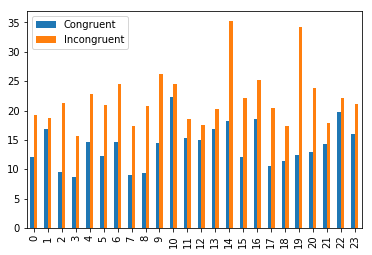

In [62]:
import matplotlib.pyplot as plt
% matplotlib inline

# 在这里创建可视化图表
data.plot(y=['Congruent', 'Incongruent'], kind='bar');

可以看出当颜色和文字不一致时，认知所需要的时间更长。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [67]:
from scipy import stats
from scipy.stats import ttest_rel
t, p = ttest_rel(data['Congruent'], data['Incongruent'])
# 在这里执行统计检验
print('t={}, p={}'.format(t, p))

t=-8.020706944109957, p=4.103000585711178e-08


置信水平通常取95%，双尾检验，显著性水平α=0.05，单侧0.025，自由度为23，查表可得t临界值为2.069  
配对t检验结果：t=-8.0207, p=4.103e-08  
P值远小于α，因此可以成功拒绝零假设。  
结论是颜色和文字不一致会使认知时间变长，结果与期望一致。